# Task
Perform a product price comparison by providing a dataset containing product names, prices, and seller information (e.g., a CSV file). The task will then involve loading this data, identifying the product, price, and seller columns, analyzing price distributions per product, identifying the cheapest and most expensive sellers, visualizing these comparisons, and summarizing the findings.

In [15]:
import pandas as pd

# Load the data from the CSV file into a pandas DataFrame
df = pd.read_csv('product_data.csv')

# Display the first 5 rows of the DataFrame
print("First 5 rows of the DataFrame:")
print(df.head())

# Display the column names of the DataFrame
print("\nColumn names of the DataFrame:")
print(df.columns)

First 5 rows of the DataFrame:
  ProductName  Price   Seller
0      Laptop   1200  Store A
1      Laptop   1150  Store B
2      Laptop   1250  Store C
3       Mouse     25  Store A
4       Mouse     30  Store B

Column names of the DataFrame:
Index(['ProductName', 'Price', 'Seller'], dtype='object')


In [31]:
import pandas as pd


data = {
    'ProductName': ['Laptop', 'speaker', 'Laptop', 'Monitor', 'Mouse', 'Keyboard', 'camera', 'SD Card', 'printer', 'CPU', 'Smartphone realme', 'Smartphone vivo', 'Smartphone oppo'],
    'Price': [1200, 1150, 1250, 25, 30, 75, 15, 18, 200, 220, 500, 480, 550],
    'Seller': ['Store A', 'Store B', 'Store C', 'Store A', 'Store B', 'Store C', 'Store A', 'Store C', 'Store B', 'Store A', 'Store A', 'Store B', 'Store C'],
    'Category': ['Electronics', 'Electronics', 'Electronics', 'Electronics', 'Electronics', 'Electronics', 'Electronics', 'Storage', 'Peripherals', 'Components', 'Mobiles', 'Mobiles', 'Mobiles']
}
df_temp = pd.DataFrame(data);

# Save the DataFrame to a CSV file named 'product_data.csv'
df_temp.to_csv('product_data.csv', index=False);

# Load the data from the CSV file into a pandas DataFrame
df = pd.read_csv('product_data.csv');

# Display the first 5 rows of the DataFrame
print("First 5 rows of the DataFrame:")
print(df.head());

# Display the column names of the DataFrame
print("\nColumn names of the DataFrame:")
print(df.columns);

First 5 rows of the DataFrame:
  ProductName  Price   Seller     Category
0      Laptop   1200  Store A  Electronics
1     speaker   1150  Store B  Electronics
2      Laptop   1250  Store C  Electronics
3     Monitor     25  Store A  Electronics
4       Mouse     30  Store B  Electronics

Column names of the DataFrame:
Index(['ProductName', 'Price', 'Seller', 'Category'], dtype='object')


In [25]:
product_col = 'ProductName'
price_col = 'Price'
seller_col = 'Seller'

print(f"Product Name Column: {product_col}")
print(f"Price Column: {price_col}")
print(f"Seller Column: {seller_col}")

Product Name Column: ProductName
Price Column: Price
Seller Column: Seller


## Visualize Price Distributions with Box Plots

### Subtask:
Generate box plots for each product to visualize the distribution of prices across different sellers, providing insights into price variability, median prices, and potential outliers.

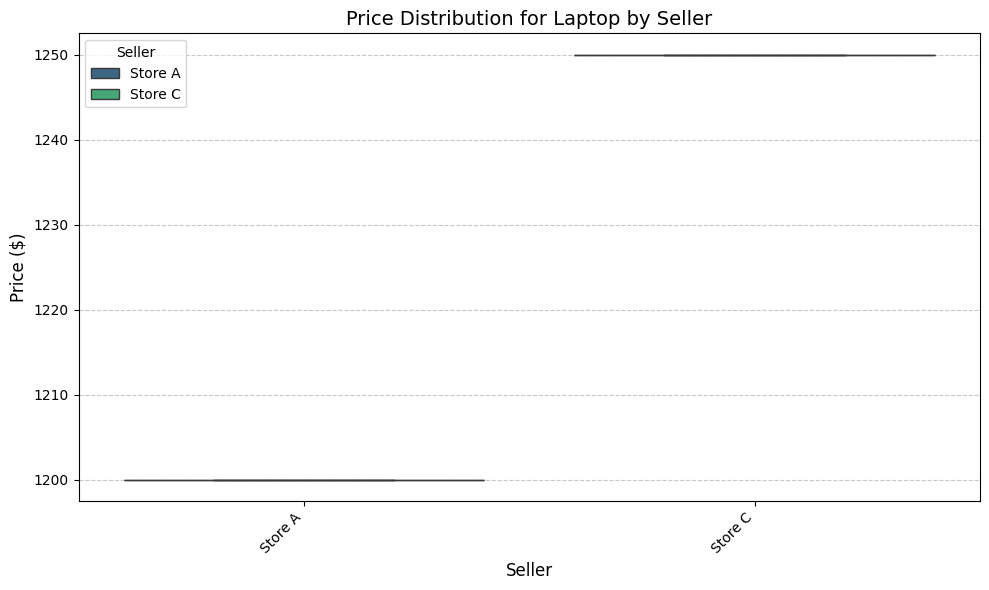

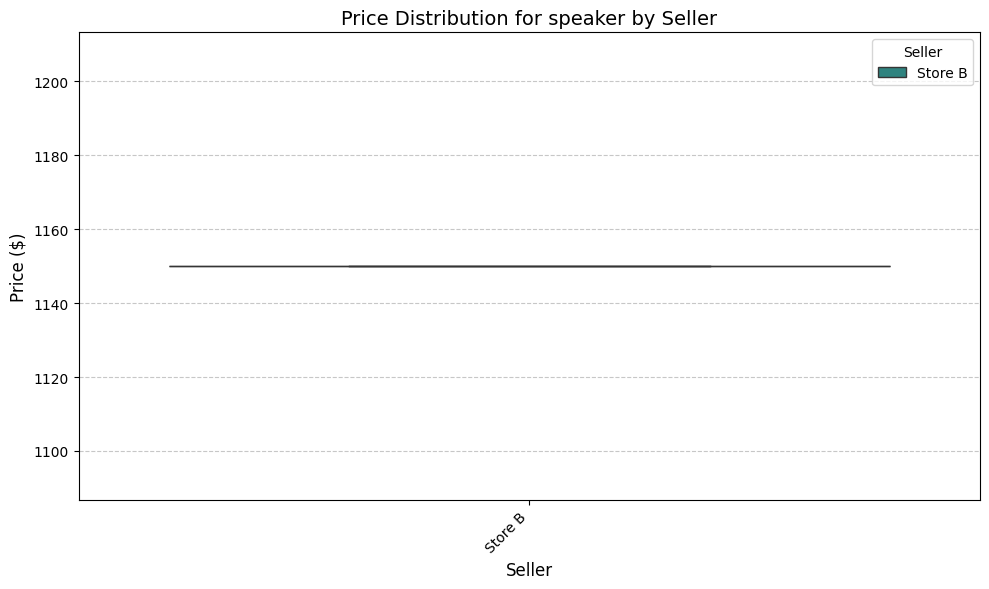

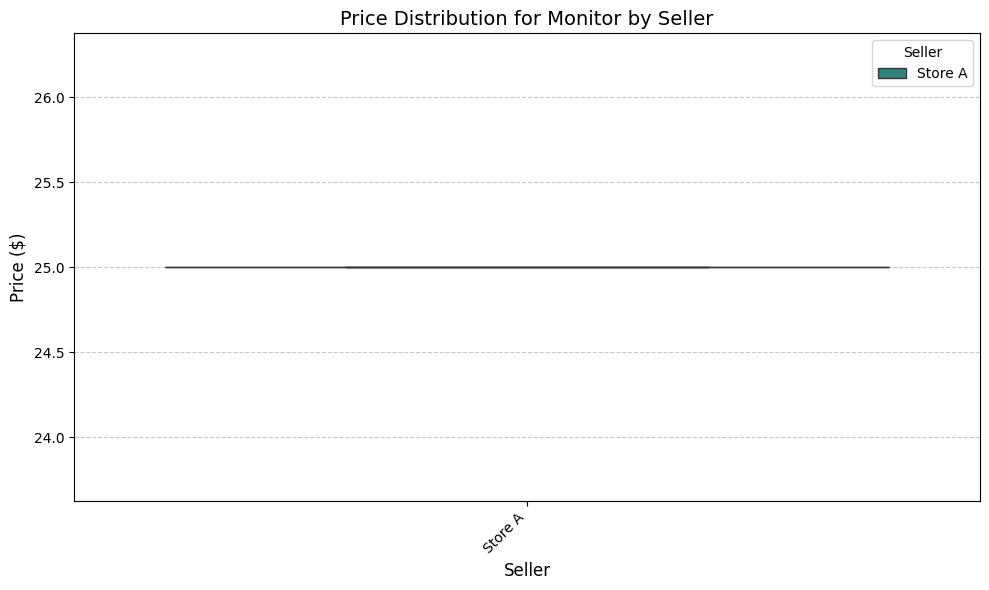

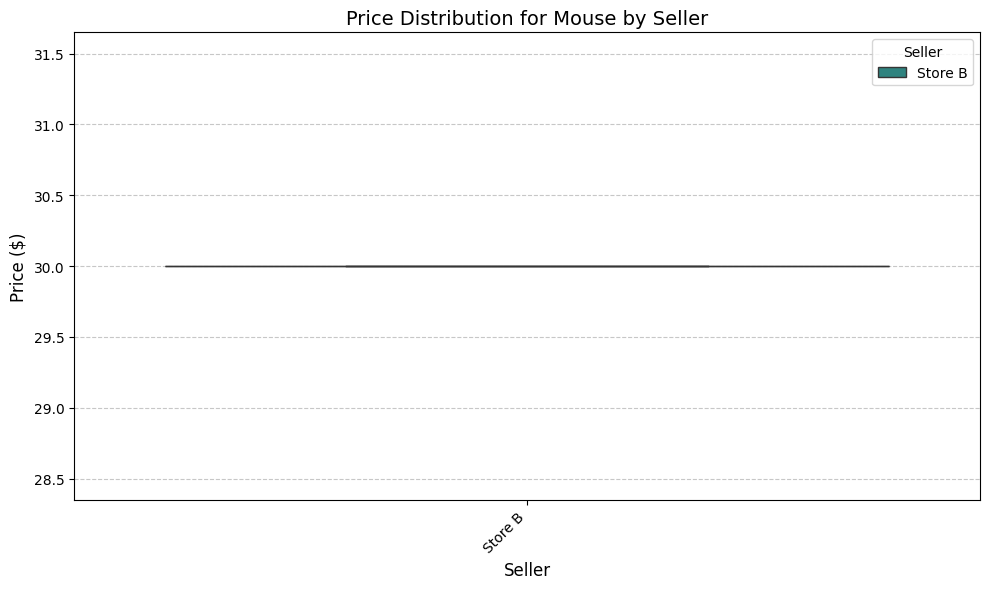

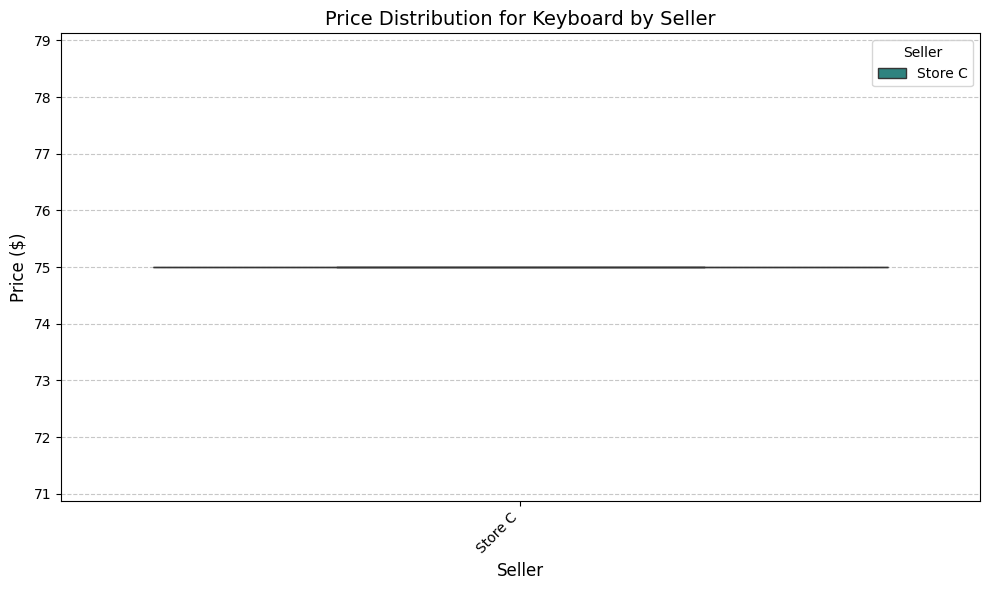

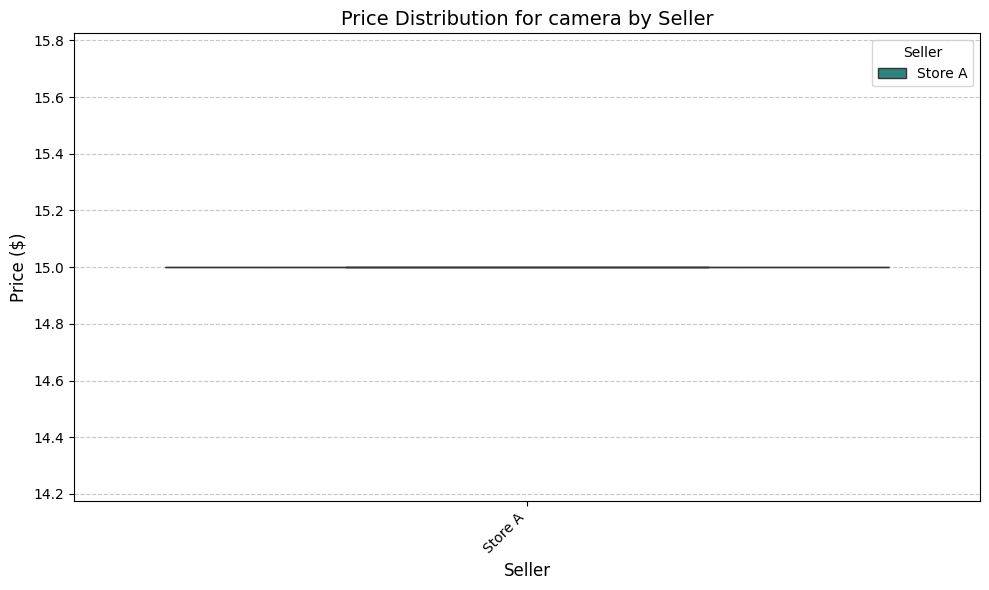

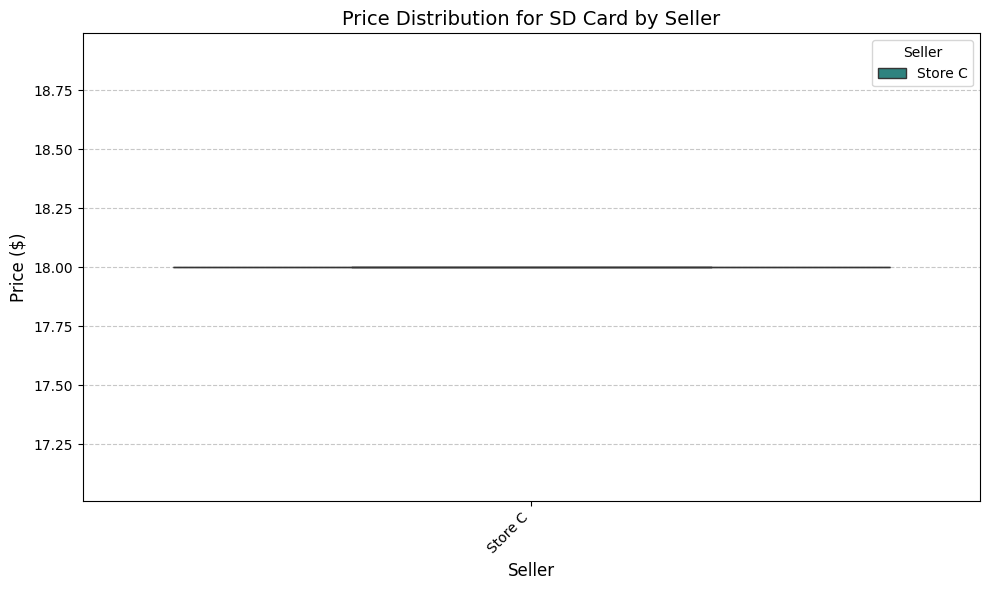

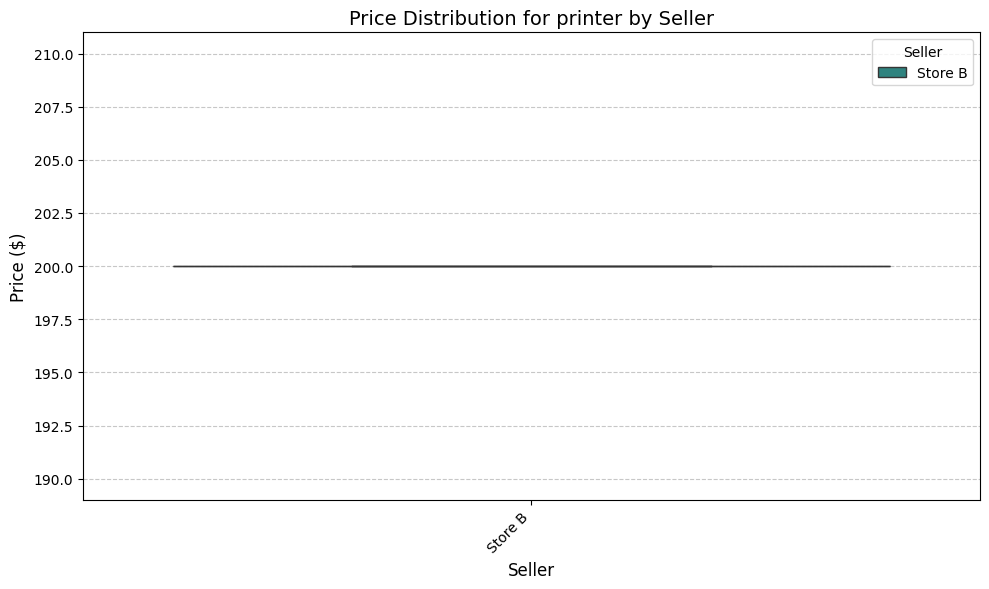

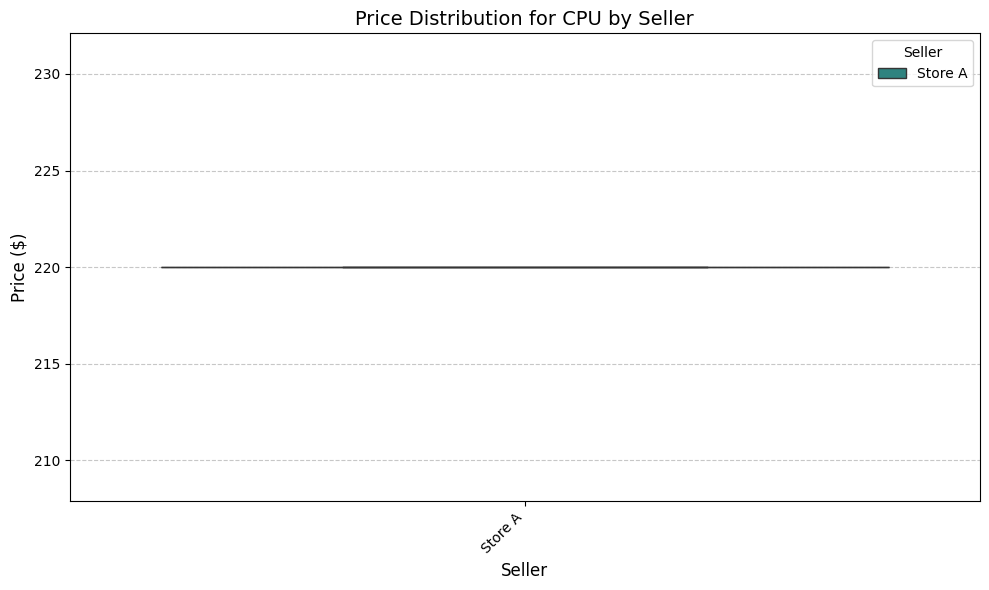

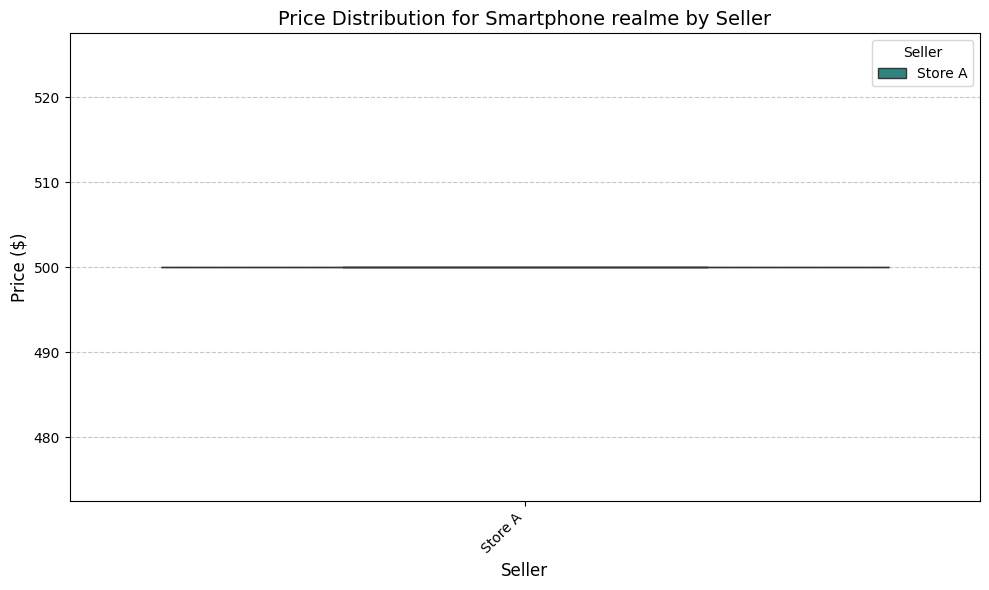

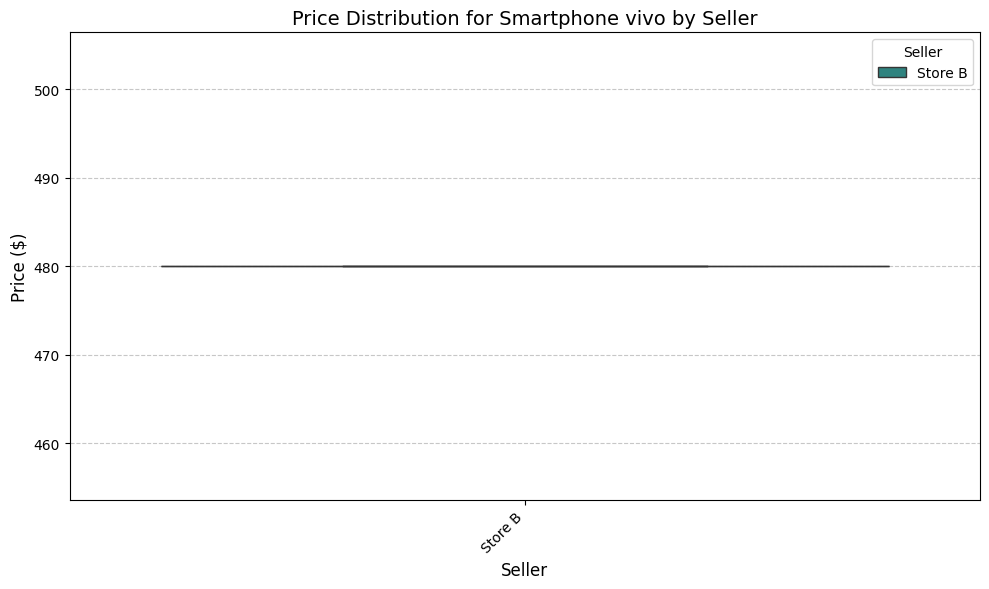

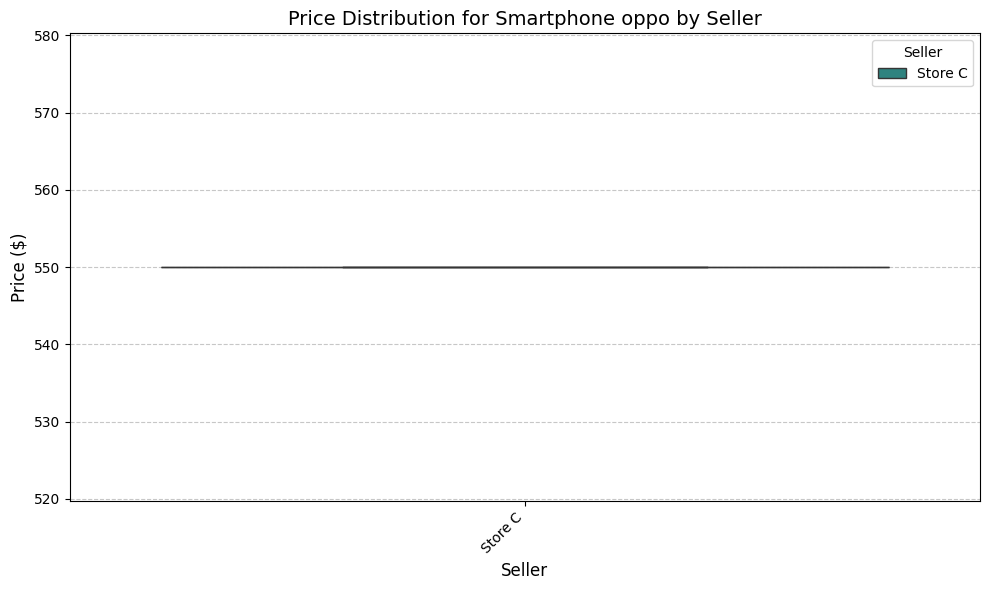

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique product names
unique_products = df[product_col].unique()

# Iterate through each unique product and create a box plot
for product in unique_products:
    # Filter data for the current product
    product_df = df[df[product_col] == product]

    # Create a box plot
    plt.figure(figsize=(10, 6)) # Increased figure size for better readability
    sns.boxplot(x=seller_col, y=price_col, data=product_df, palette='viridis', hue=seller_col, legend=True) # Explicitly set legend=True

    # Add titles and labels
    plt.title(f'Price Distribution for {product} by Seller', fontsize=14) # Enhanced title font size
    plt.xlabel('Seller', fontsize=12)
    plt.ylabel('Price ($)', fontsize=12) # Added unit to y-label
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for long names
    plt.grid(axis='y', linestyle='--', alpha=0.7) # Added a grid for easier value comparison
    plt.tight_layout()
    plt.show()

## Consolidated Price Range Bar Chart

### Subtask:
Visualize the minimum, mean, and maximum prices for all products using a grouped bar chart to get a consolidated overview of price ranges across the entire product catalog in a bar format.

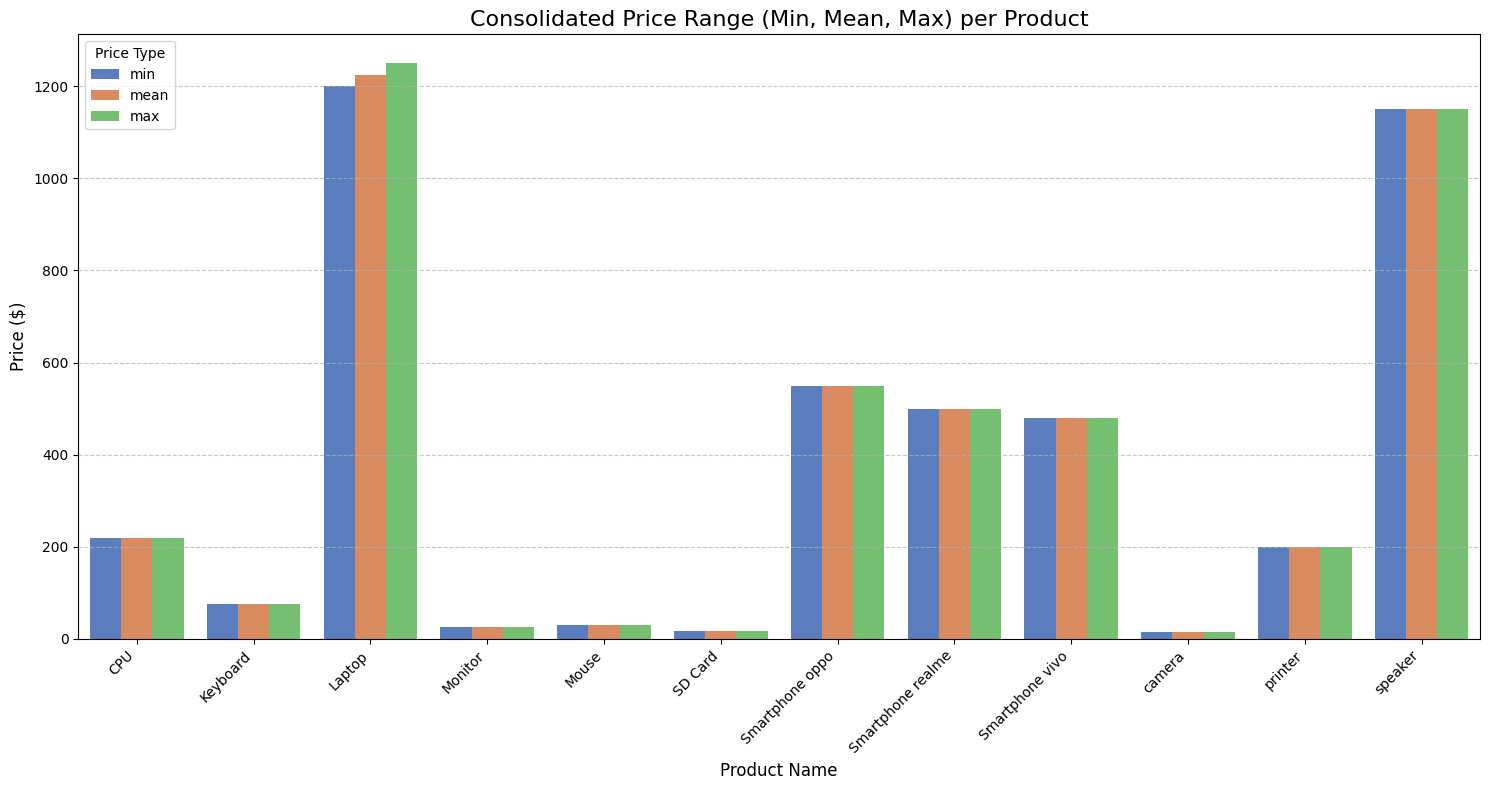

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure price_distribution DataFrame is updated after data changes
price_distribution = df.groupby(product_col)[price_col].agg(['min', 'mean', 'max']).reset_index()

# Melt the DataFrame to prepare for grouped bar chart
price_melted = price_distribution.melt(id_vars=product_col, var_name='Price Type', value_name='Price')

plt.figure(figsize=(15, 8))

sns.barplot(x=product_col, y='Price', hue='Price Type', data=price_melted, palette='muted')

plt.title('Consolidated Price Range (Min, Mean, Max) per Product', fontsize=16)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Price Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Consolidated Price Range Visualization

### Subtask:
Visualize the minimum, mean, and maximum prices for all products on a single graph to get a consolidated overview of price ranges across the entire product catalog.

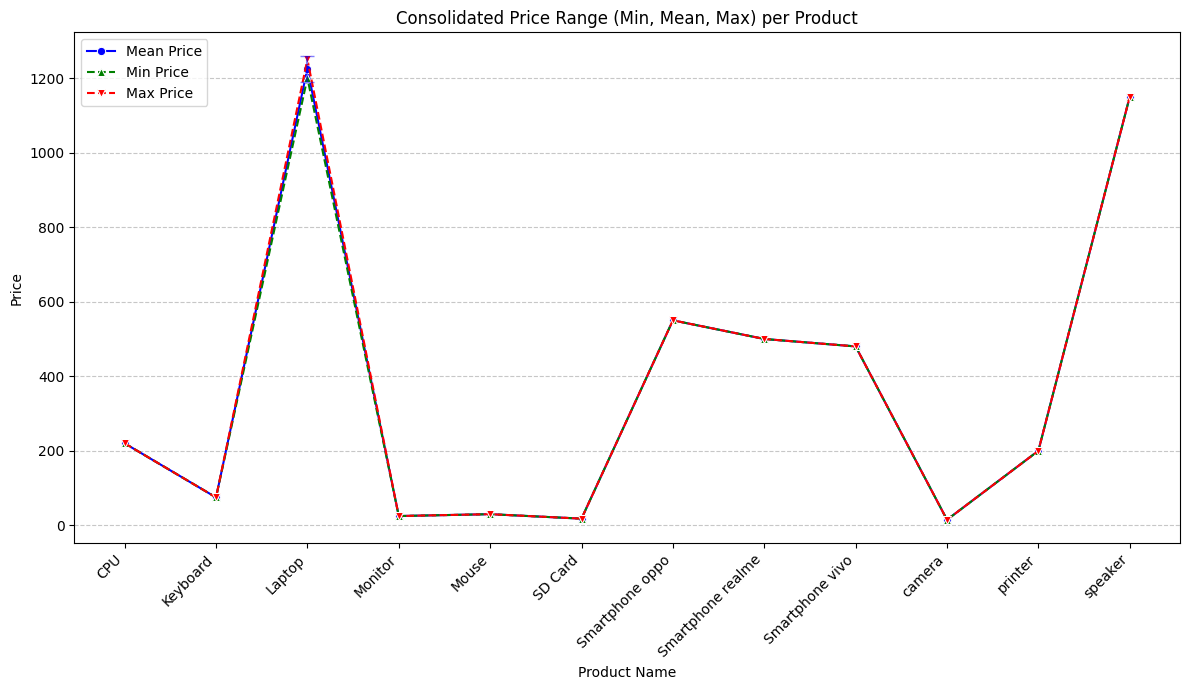

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure price_distribution DataFrame is updated after data changes
price_distribution = df.groupby(product_col)[price_col].agg(['min', 'mean', 'max', 'std']).reset_index()

plt.figure(figsize=(12, 7))

# Plotting min, mean, and max prices for each product
sns.lineplot(x='ProductName', y='mean', data=price_distribution, marker='o', color='blue', label='Mean Price')
sns.lineplot(x='ProductName', y='min', data=price_distribution, marker='^', color='green', linestyle='--', label='Min Price')
sns.lineplot(x='ProductName', y='max', data=price_distribution, marker='v', color='red', linestyle='--', label='Max Price')

# Optionally, add error bars if 'std' is not NaN
for index, row in price_distribution.iterrows():
    if not pd.isna(row['std']):
        plt.errorbar(x=row['ProductName'], y=row['mean'], yerr=row['std'], color='blue', capsize=5, alpha=0.5)

plt.title('Consolidated Price Range (Min, Mean, Max) per Product')
plt.xlabel('Product Name')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [11]:
price_distribution = df.groupby(product_col)[price_col].agg(['mean', 'min', 'max', 'std']).reset_index()

print("Price Distribution per Product:")
print(price_distribution)

Price Distribution per Product:
  ProductName    mean   min   max        std
0    Keyboard    75.0    75    75        NaN
1      Laptop  1200.0  1150  1250  50.000000
2       Mouse    27.5    25    30   3.535534


In [12]:
cheapest_sellers = df.loc[df.groupby(product_col)[price_col].idxmin()]
most_expensive_sellers = df.loc[df.groupby(product_col)[price_col].idxmax()]

print("Cheapest Sellers per Product:")
print(cheapest_sellers)

print("\nMost Expensive Sellers per Product:")
print(most_expensive_sellers)

Cheapest Sellers per Product:
  ProductName  Price   Seller
5    Keyboard     75  Store C
1      Laptop   1150  Store B
3       Mouse     25  Store A

Most Expensive Sellers per Product:
  ProductName  Price   Seller
5    Keyboard     75  Store C
2      Laptop   1250  Store C
4       Mouse     30  Store B


/tmp/ipython-input-2914696101.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seller_col, y=price_col, data=product_df, palette='viridis')


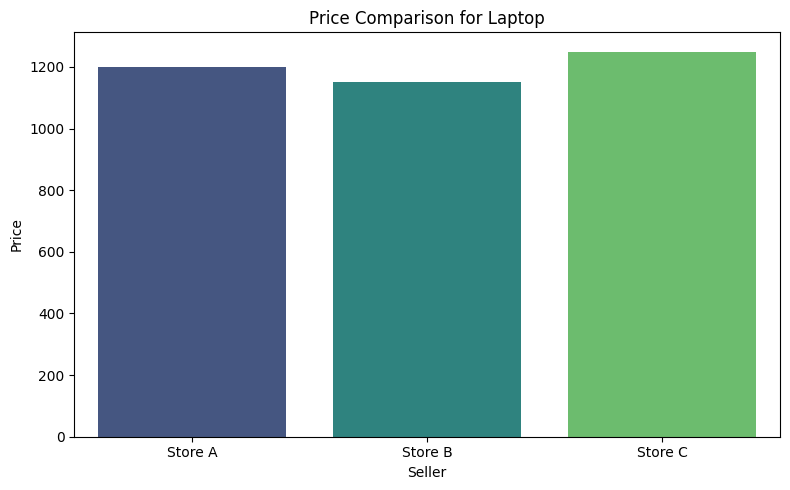

/tmp/ipython-input-2914696101.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seller_col, y=price_col, data=product_df, palette='viridis')


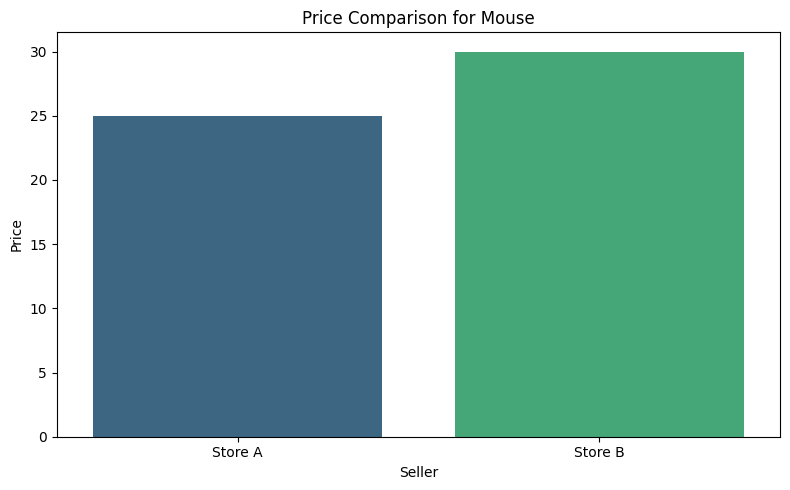

/tmp/ipython-input-2914696101.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seller_col, y=price_col, data=product_df, palette='viridis')


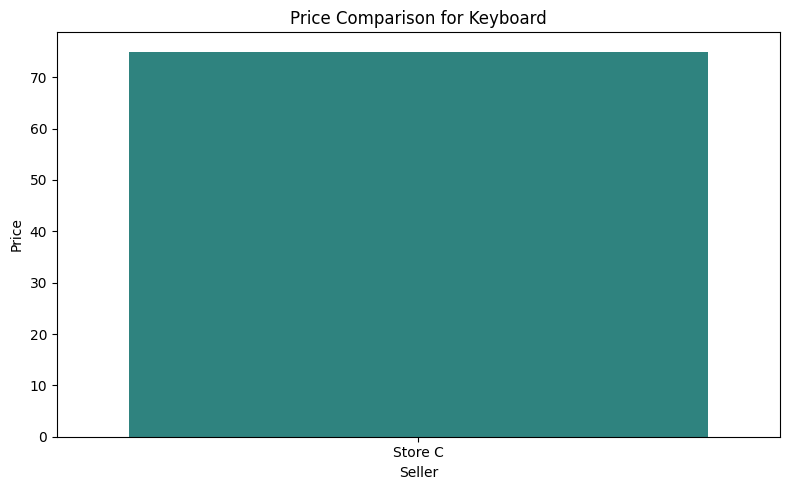

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique product names
unique_products = df[product_col].unique()

# Iterate through each unique product and create a bar plot
for product in unique_products:
    # Filter data for the current product
    product_df = df[df[product_col] == product]

    # Create a bar plot
    plt.figure(figsize=(8, 5))
    sns.barplot(x=seller_col, y=price_col, data=product_df, palette='viridis')

    # Add titles and labels
    plt.title(f'Price Comparison for {product}')
    plt.xlabel('Seller')
    plt.ylabel('Price')
    plt.tight_layout()
    plt.show()

**Reasoning**:
The previous code generated a FutureWarning because `palette` was used without assigning a `hue` variable. To comply with the deprecation warning and ensure proper color mapping, I will explicitly set `hue=seller_col` and `legend=False` in the `sns.barplot` call.



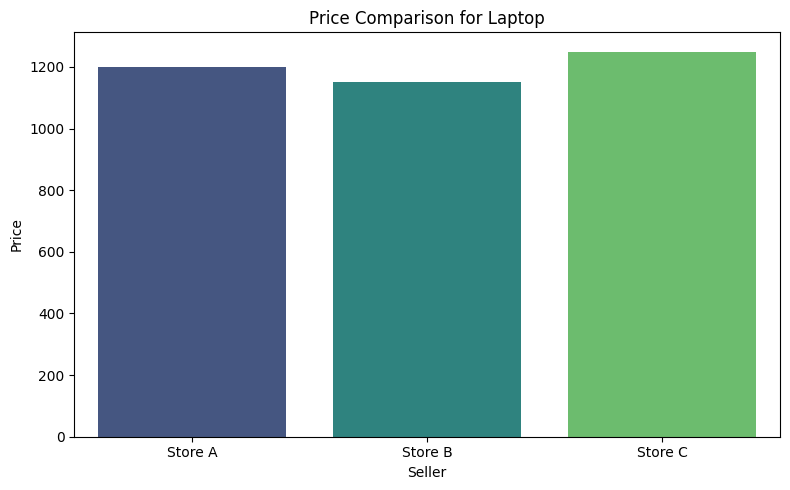

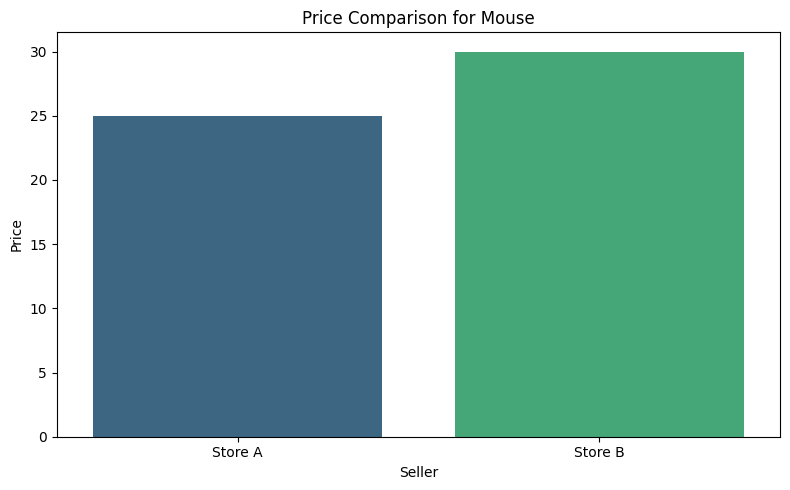

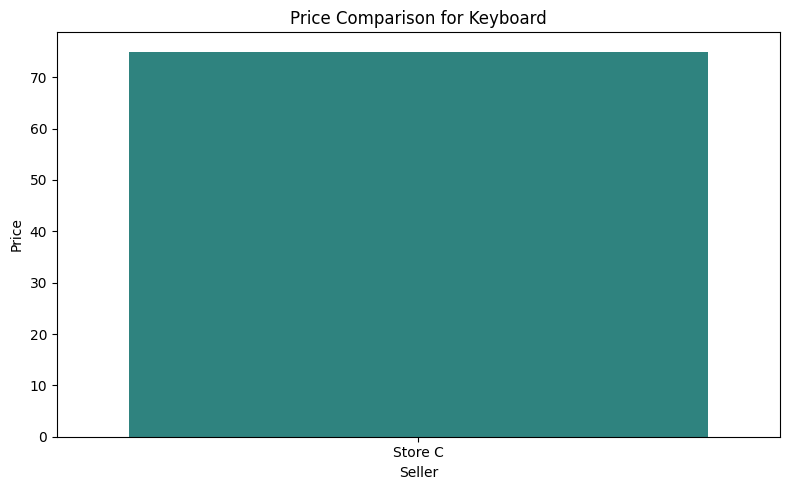

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique product names
unique_products = df[product_col].unique()

# Iterate through each unique product and create a bar plot
for product in unique_products:
    # Filter data for the current product
    product_df = df[df[product_col] == product]

    # Create a bar plot
    plt.figure(figsize=(8, 5))
    sns.barplot(x=seller_col, y=price_col, data=product_df, palette='viridis', hue=seller_col, legend=False)

    # Add titles and labels
    plt.title(f'Price Comparison for {product}')
    plt.xlabel('Seller')
    plt.ylabel('Price')
    plt.tight_layout()
    plt.show()

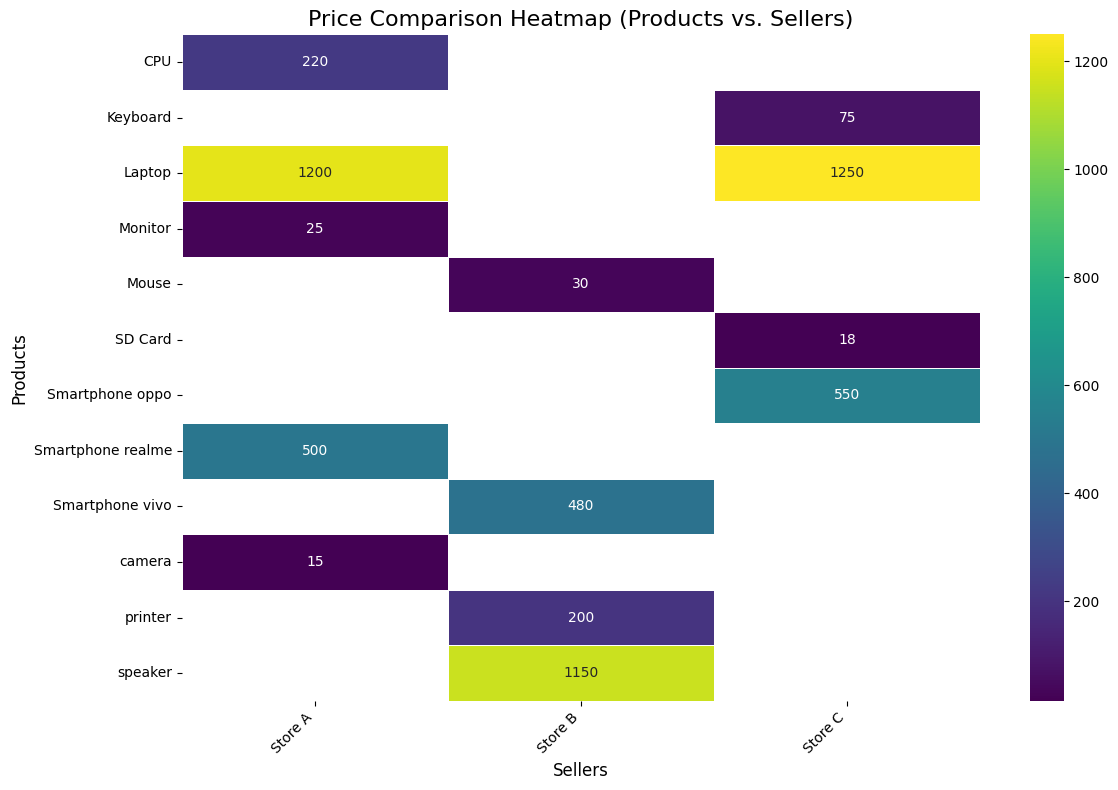

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a pivot table for the heatmap
price_matrix = df.pivot_table(index=product_col, columns=seller_col, values=price_col)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(price_matrix, annot=True, cmap='viridis', fmt='.0f', linewidths=.5)

# Add titles and labels
plt.title('Price Comparison Heatmap (Products vs. Sellers)', fontsize=16)
plt.xlabel('Sellers', fontsize=12)
plt.ylabel('Products', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()